C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


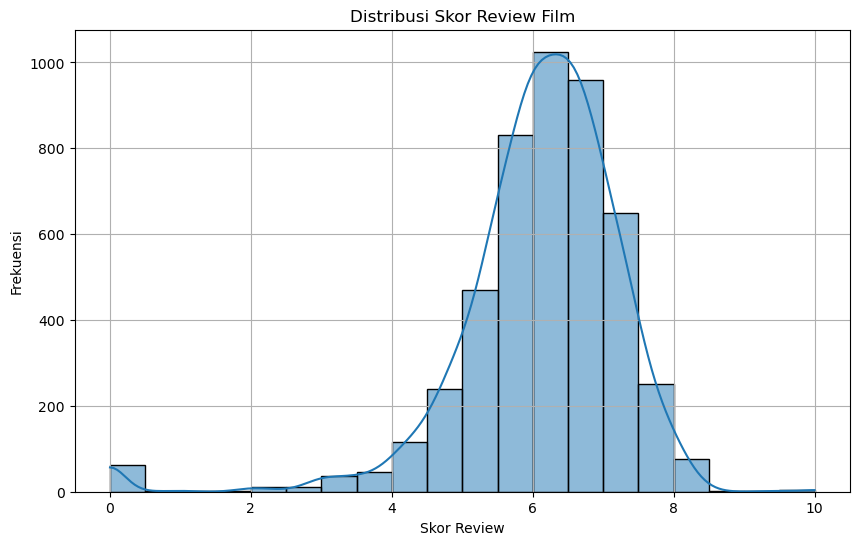

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


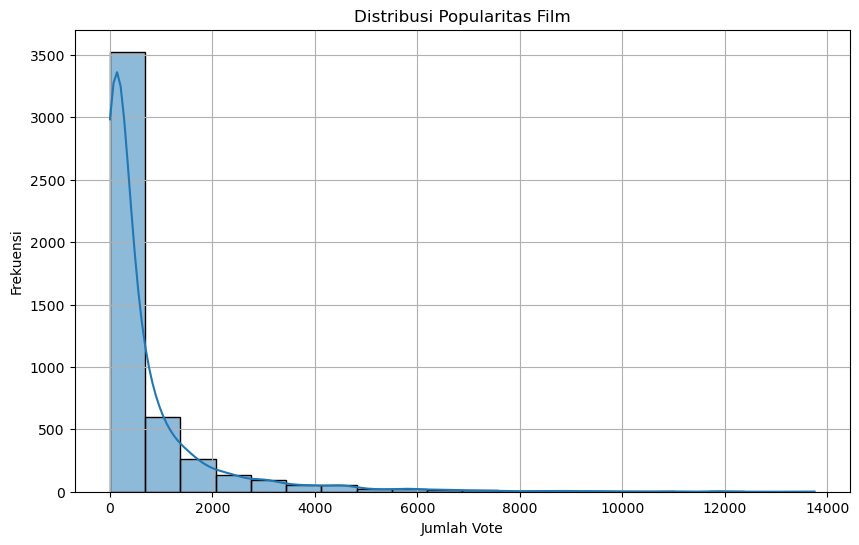

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


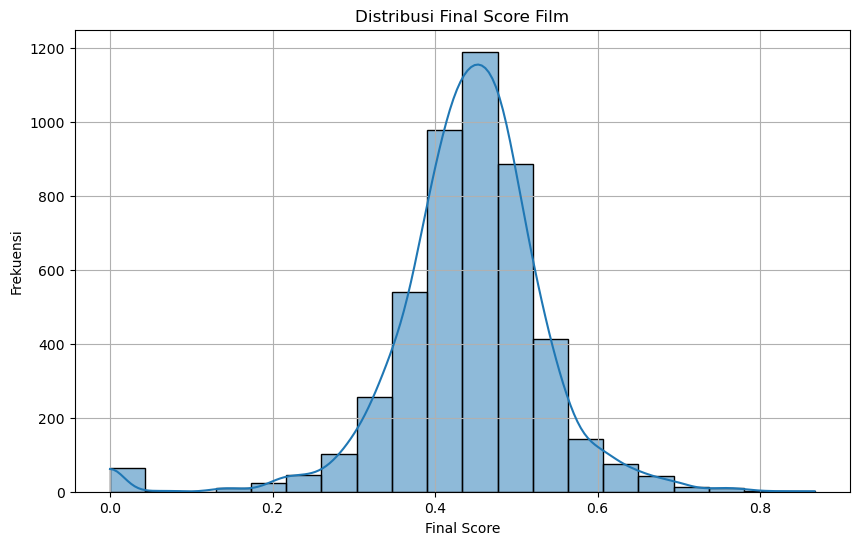

In [3]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Lokasi dataset
file_path = r'C:\Tugas\stki uas\tmdb_5000_movies.csv'

# Mengecek keberadaan dataset
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Dataset tidak ditemukan di lokasi: {file_path}")

# Memuat dataset
movies = pd.read_csv(file_path)

# Memilih kolom yang relevan
movies = movies[['title', 'overview', 'genres', 'vote_average', 'vote_count']].dropna()

# Mengganti nilai inf dan -inf dengan NaN
movies.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Pra-pemrosesan Genres
def extract_genres(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except Exception:
        return []

movies['genres'] = movies['genres'].apply(extract_genres)
movies['genres_str'] = movies['genres'].apply(lambda x: ' '.join(x))

# Kombinasi Overview dan Genres
movies['content'] = movies['overview'] + ' ' + movies['genres_str']

# Representasi Teks
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(movies['content'])

# Menghitung Kemiripan Kosinus
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Normalisasi Skor dan Popularitas
scaler = MinMaxScaler()
movies['normalized_vote_average'] = scaler.fit_transform(movies[['vote_average']])
movies['normalized_vote_count'] = scaler.fit_transform(movies[['vote_count']])

# Menggabungkan Skor
def calculate_final_score(vote_weight, count_weight):
    movies['final_score'] = (
        vote_weight * movies['normalized_vote_average'] +
        count_weight * movies['normalized_vote_count']
    )

# Pengaturan Bobot
vote_weight = 0.7
count_weight = 0.3
calculate_final_score(vote_weight, count_weight)

# Plot Grafik Distribusi Skor Review
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribusi Skor Review Film')
plt.xlabel('Skor Review')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Plot Grafik Distribusi Popularitas
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_count'], bins=20, kde=True)
plt.title('Distribusi Popularitas Film')
plt.xlabel('Jumlah Vote')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Plot Grafik Final Score
plt.figure(figsize=(10, 6))
sns.histplot(movies['final_score'], bins=20, kde=True)
plt.title('Distribusi Final Score Film')
plt.xlabel('Final Score')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()